<table align="center" width=150%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=5.5px>
                    <b>STATISTICAL MACHINE LEARNING APPROACHES TO LIVER DISEASE PREDICTION
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## About Dataset
### Data Set Information

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from test samples in North East of Andhra Pradesh, India. 'is_patient' is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".





<a id='import_lib'></a>
# 1. Import Libraries

In [ ]:
# For numerical computing
import numpy as np

# For dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# For visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# Import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# To split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# To perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Machine-Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

import os
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# 15 and 8 are width and height in inches respectively
plt.rcParams['figure.figsize'] = [15,8]

<a id='Read_Data'></a>
# 2. Read Data

In [ ]:
# read csv file using pandas
df=pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv')

In [ ]:
# display the top 5 rows of the dataframe
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# display the last 5 rows of the dataframe
df.tail()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Lets take a glance at our dataframe and see how it looks

#### Dimensions of the data

In [ ]:
# 'shape' function returns a tuple that gives the total number of rows and columns in the data
df.shape

(583, 11)

In [ ]:
df.columns.values

array(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin',
       'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos',
       'is_patient'], dtype=object)

<a id='data_preparation'></a>
# 3. Data Analysis and Preparation

<a id='Data_Understanding'></a>
## 3.1 Understand the Dataset

<a id='Data_Types'></a>
### 3.1.1 Data Type
The data types in pandas dataframes are the object, float, int64, bool, and datetime64. We should know the data type of each column.

**1. Check for the data type**

In [ ]:
# 'dtypes' provides the data type for each column
df.dtypes

age                   int64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


<a id='Summary_Statistics'></a>
### 3.1.2 Summary Statistics

Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for categorical variables.

**1. For getting the statistical summary of numerical variables we use the describe()**

In [ ]:
# by default the describe function returns the summary of numerical variables
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False': sorts values in the descending order
total_nulls = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
percent_null = (df.isnull().sum()*100/df.isnull().count()) 
percent_null = percent_null.sort_values(ascending = False) 

# concat the 'total_nulls' and 'percent_null' columns
# 'axis = 1' stands for columns
missing_values = pd.concat([total_nulls, percent_null], axis = 1, keys = ['Total Nulls', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_values['Data Type'] = df[missing_values.index].dtypes
missing_values

,Total Nulls,Percentage of Missing Values,Data Type
alkphos,4,0.686106,float64
age,0,0.000000,int64
gender,0,0.000000,object
tot_bilirubin,0,0.000000,float64
direct_bilirubin,0,0.000000,float64
tot_proteins,0,0.000000,int64
albumin,0,0.000000,int64
ag_ratio,0,0.000000,int64
sgpt,0,0.000000,float64
sgot,0,0.000000,float64


In [ ]:
#Imputation using SkLearns Simple Imputer for Missing Values
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#Imputing values
df['alkphos']=imp.fit_transform(df[['alkphos']])

In [ ]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

**2. For getting the statistical summary of categorical features we use the describe(include = object)**

In [ ]:
# summary of categorical variables
df.describe(include = object)

,gender
count,583
unique,2
top,Male
freq,441


In [ ]:
df.nunique()

age                  72
gender                2
tot_bilirubin       113
direct_bilirubin     80
tot_proteins        263
albumin             152
ag_ratio            177
sgpt                 58
sgot                 40
alkphos              70
is_patient            2
dtype: int64

<a id='distribution_variables'></a>
### 3.1.3 Distribution of Variables

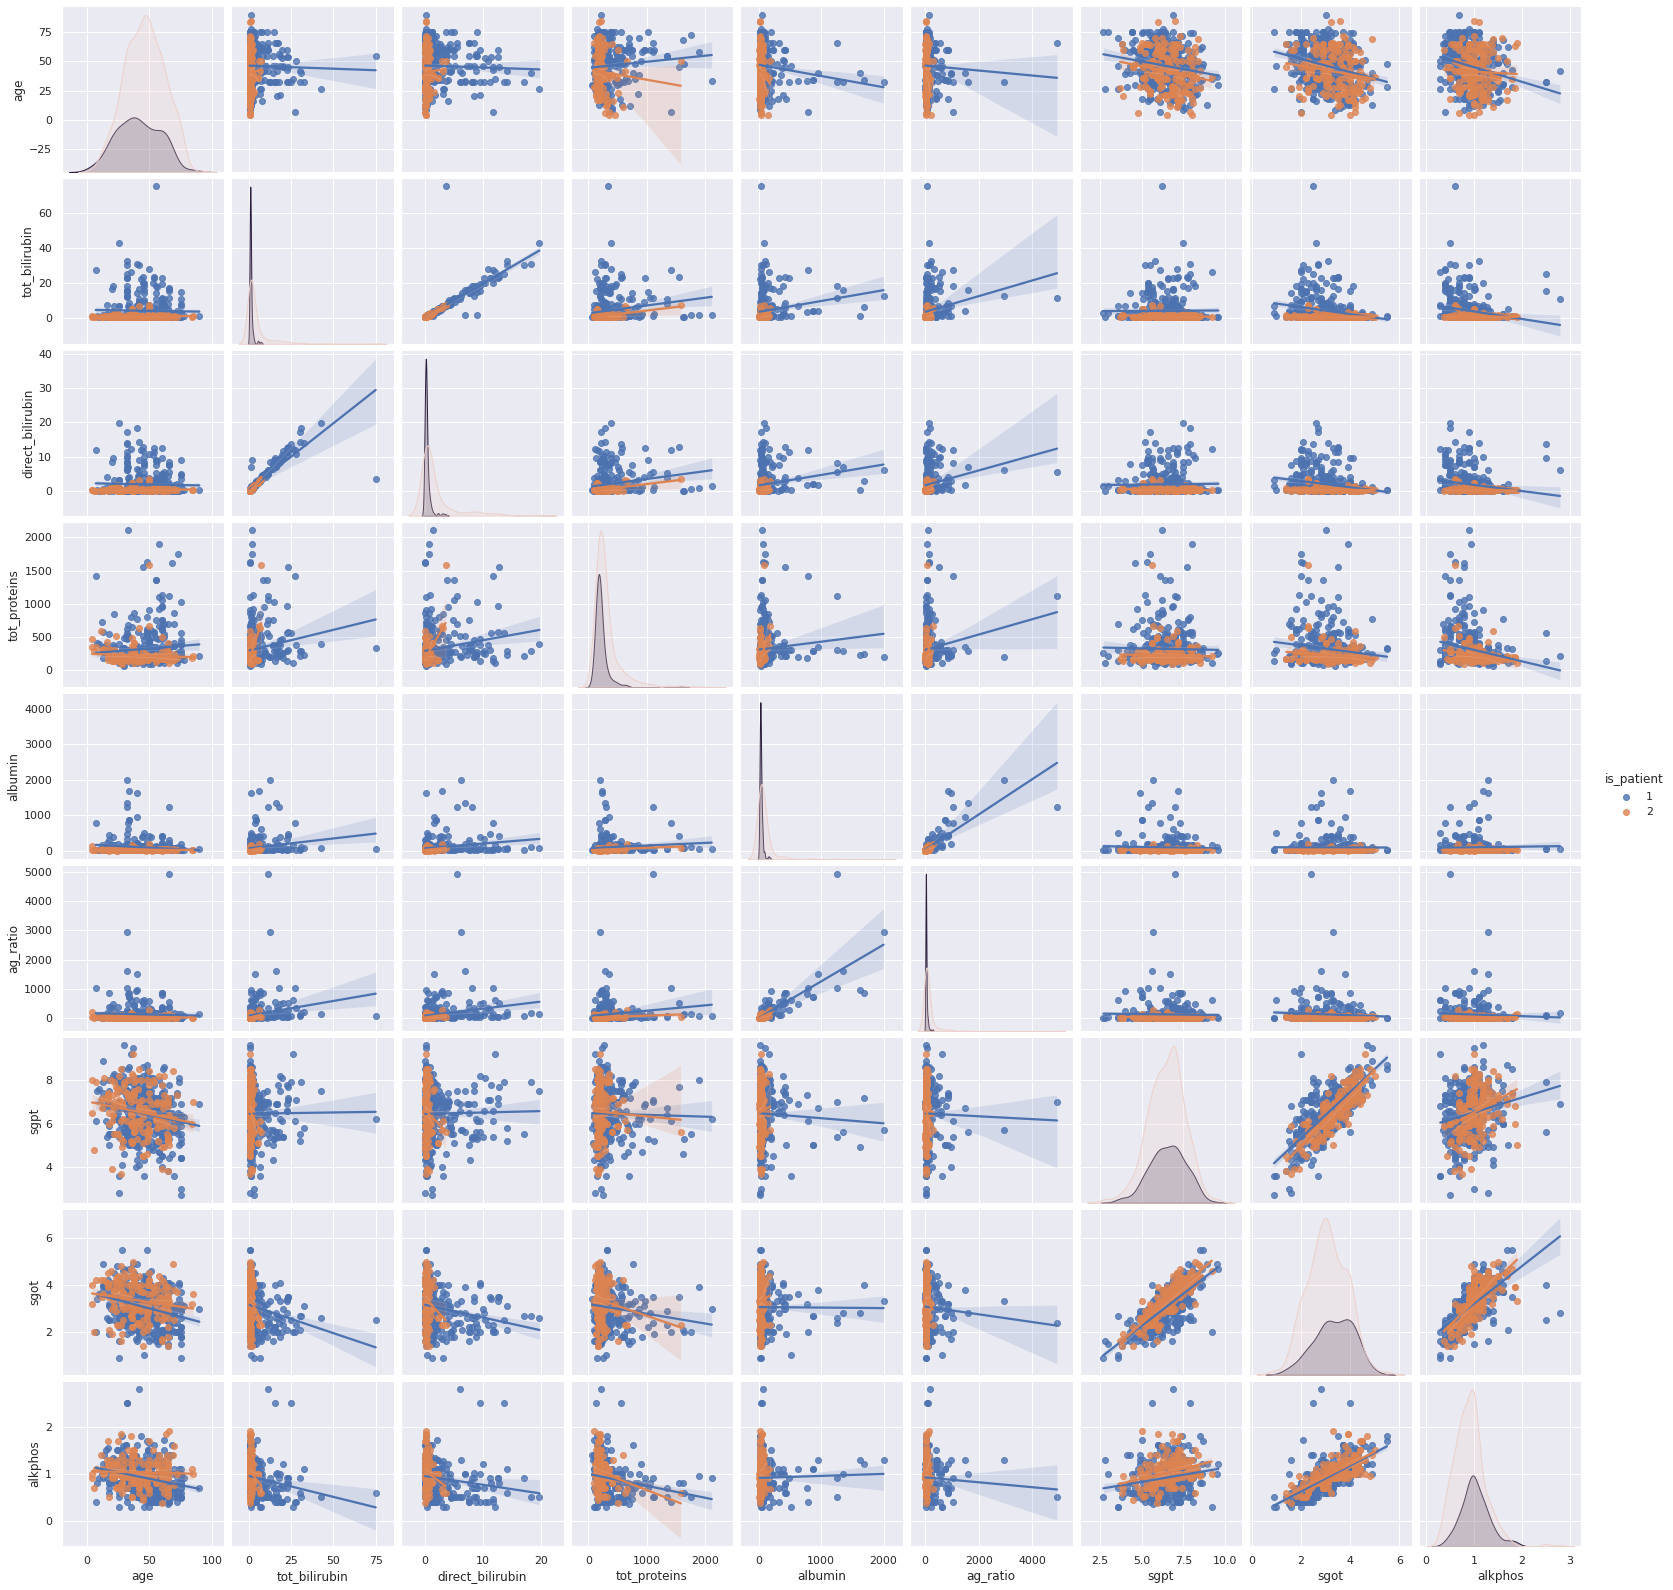

In [ ]:
#Implementing Pairplot to see the various mixtures
sns.set()
sns.pairplot(df, hue= 'is_patient', kind = 'reg')

**1. Distribution of numeric variables**

We plot the histogram to check the distribution of the variables.

In [ ]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number is used to select the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumin',
       'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [ ]:
len(df_numeric_features.columns)

10

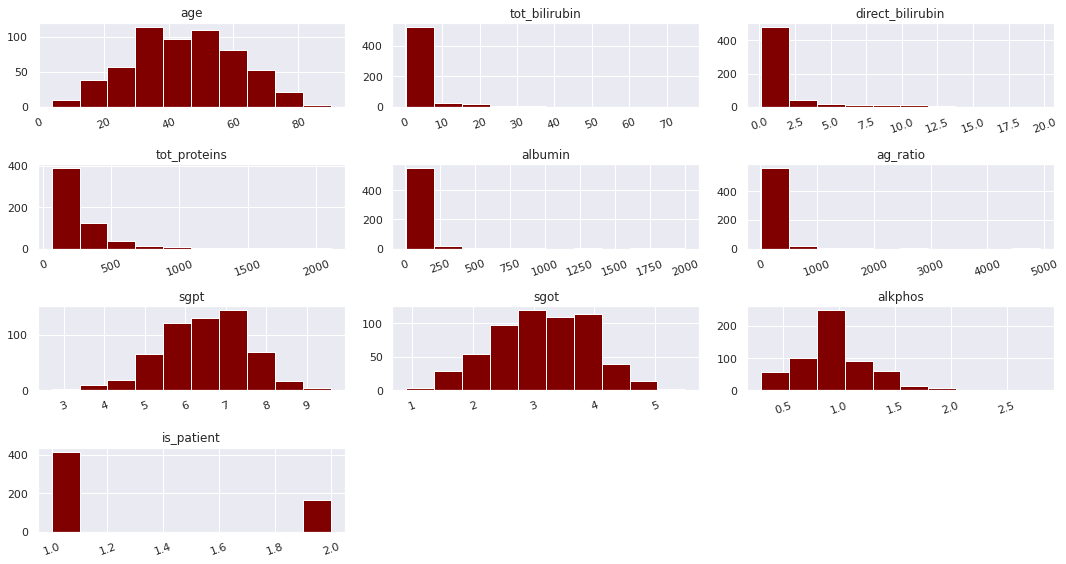

In [ ]:
# plot the histogram of numeric variables
# hist() by default considers the numeric variables only, 
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
df.hist(xrot = 20, color = "maroon")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

**2. Distribution of categorical variables**

For the categoric variables, we plot the countplot

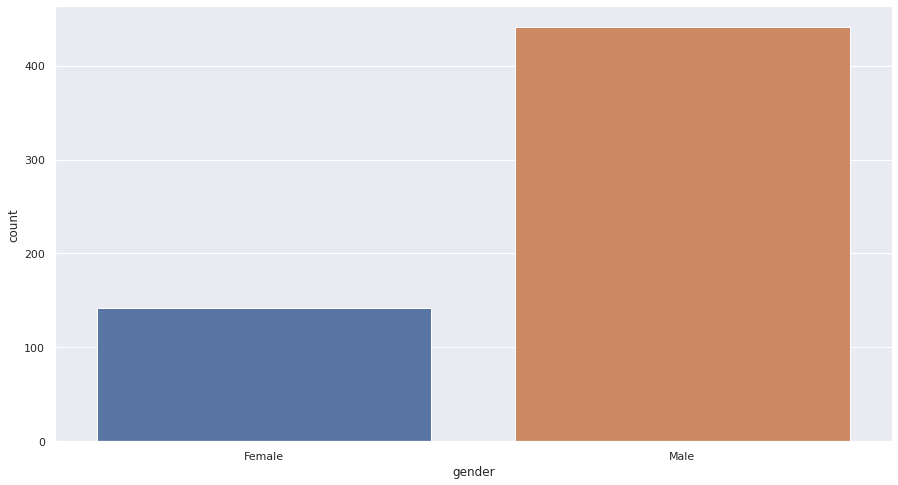

In [ ]:
plt.figure()
sns.countplot(x='gender', data=df)

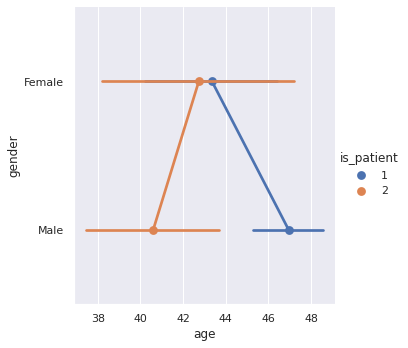

In [ ]:
sns.factorplot (x="age", y="gender", hue="is_patient", data=df);

Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  441
Number of patients that are female:  142


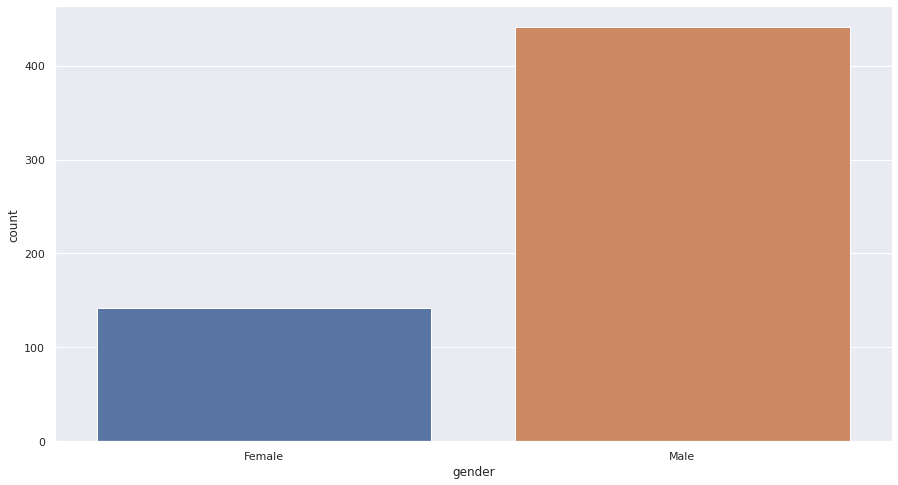

In [ ]:
sns.countplot(data=df, x = 'gender', label='Count')

M, F = df['gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

In [ ]:
# if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['gender'] = df['gender'].map(partition)

Label Male as 0 and Female as 1

Variations in outputs with respect to Gender

In [ ]:
gender_data = df[['gender', 'is_patient']].groupby('gender', as_index = False).agg(np.sum)
gender_data

,gender,is_patient
0,0,558
1,1,192


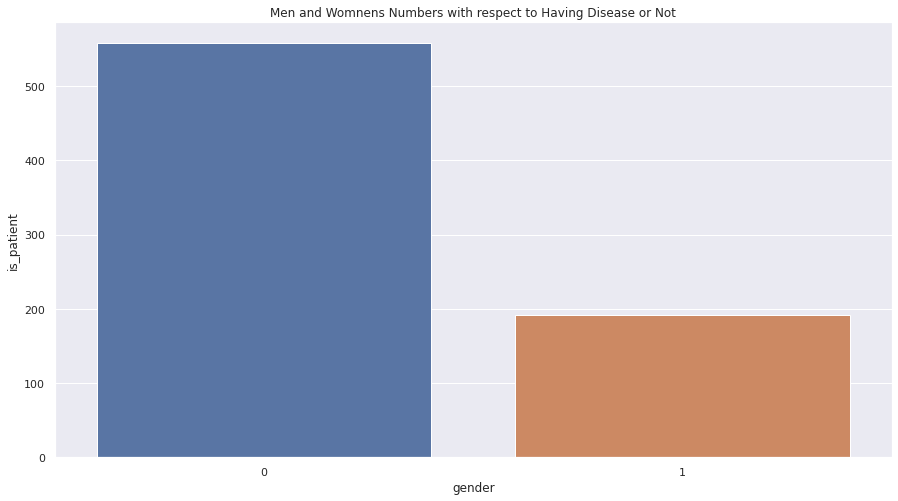

In [ ]:
plt.title('Men and Womnens Numbers with respect to Having Disease or Not')
sns.barplot(x = 'gender', y = 'is_patient', data = gender_data)

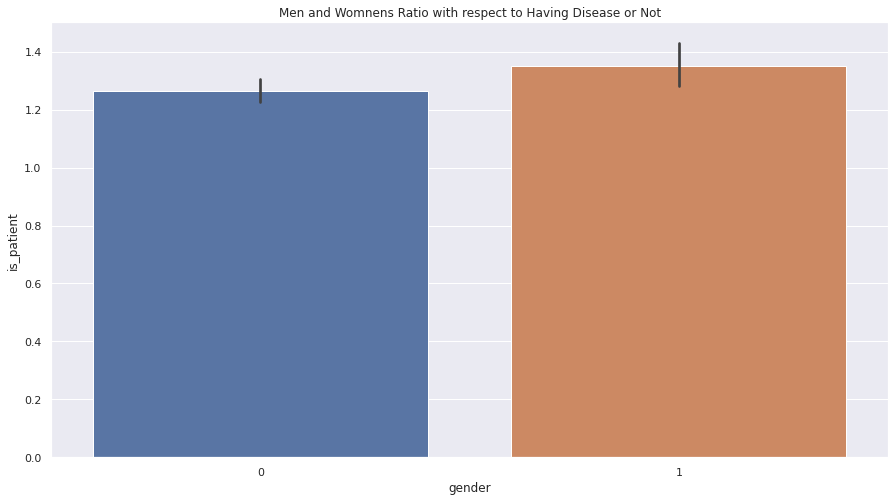

In [ ]:
plt.title('Men and Womnens Ratio with respect to Having Disease or Not')
sns.barplot(x = 'gender', y = 'is_patient', data = df)

In [ ]:
# Can see that Men have a higher chance of having Liver Disease
# We can see a relationship between total_proteins, gender and their final outcome
df_liver_TP = df[['gender', 'tot_proteins', 'is_patient']].groupby(['gender'], as_index=False).agg(np.sum)
df_liver_TP

,gender,tot_proteins,is_patient
0,0,126474,558
1,1,42932,192


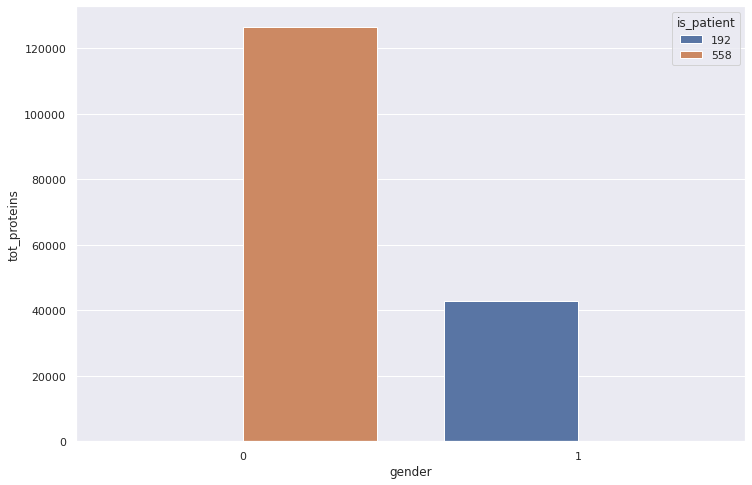

In [ ]:
#Plotting it on a graph for better visualization
plt.figure(figsize = (12,8))
sns.barplot(x = 'gender', y = 'tot_proteins', hue= 'is_patient', data = df_liver_TP)

#### 2-D Scatter Plot - Direct_Bilirubin and Total_Bilirubin

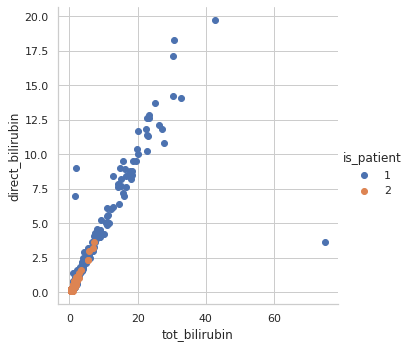

In [ ]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'is_patient', size = 5).map(plt.scatter, 'tot_bilirubin', 'direct_bilirubin').add_legend()

#### 2-D Scatter Plot - Albumin and Total_Bilirubin

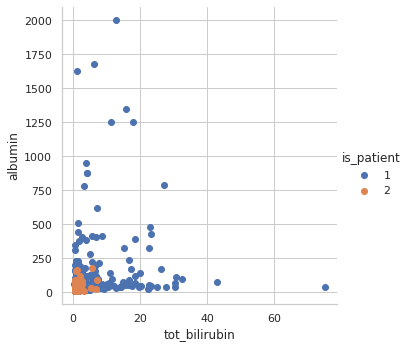

In [ ]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'is_patient', size = 5).map(plt.scatter, 'tot_bilirubin', 'albumin').add_legend()

#### 2-D Scatter Plot -Total_Protiens and Albumin_and_Globulin_Ratio

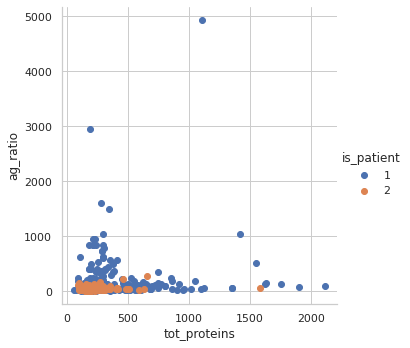

In [ ]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'is_patient', size = 5).map(plt.scatter, 'tot_proteins', 'ag_ratio').add_legend()

In [ ]:
#This is without the NaN's meaning we haven't includes the empty variables
df.describe()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000
